In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()

**Salary VS Count of Top Skills For Data Analyst**

In [4]:
df_da= df[df['job_title_short']=='Data Analyst'] #Only Data Analyst Jobs
df_da=df_da[df_da['job_skills'].notna()] #Remove NaN Skills

In [5]:
# Converts string representation of lists to actual lists
import ast
df_da['job_skills']= df_da['job_skills'].apply(lambda x: ast.literal_eval(x)) 

In [6]:
df_da_exp = df_da.explode('job_skills') # Explode the job_skills column
final_df=df_da_exp.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg' , 'median')
).fillna(0).sort_values(by='skill_count',ascending=False).head(10)

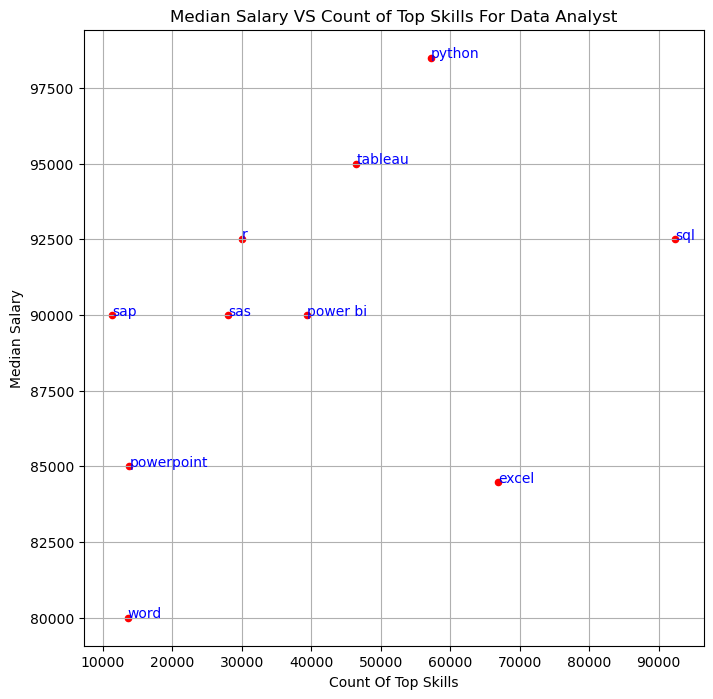

In [7]:
final_df.plot(kind='scatter', x='skill_count', y='median_salary',figsize=(8,8),title='Median Salary VS Count of Top Skills For Data Analyst',color='r',marker='o',grid=True)
for i , skills in enumerate(final_df.index):
    plt.text(final_df['skill_count'].iloc[i], final_df['median_salary'].iloc[i], skills , color='b')
    plt.xlabel('Count Of Top Skills')
    plt.ylabel('Median Salary')


**To Show All Titles In one Plot**

In [25]:
import ast
new_df = df[df['job_skills'].notna()]  # Remove NaN Skills from the original DataFrame
new_df['job_skills'] = new_df['job_skills'].apply(lambda x: ast.literal_eval(x))

C:\Users\sonip\AppData\Local\Temp\ipykernel_3224\2564053059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['job_skills'] = new_df['job_skills'].apply(lambda x: ast.literal_eval(x))


In [26]:
new_df_exp = new_df.explode('job_skills')  # Explode the job_skills column

In [ ]:
job_titles = df['job_title_short'].unique()  # Get unique job titles

10

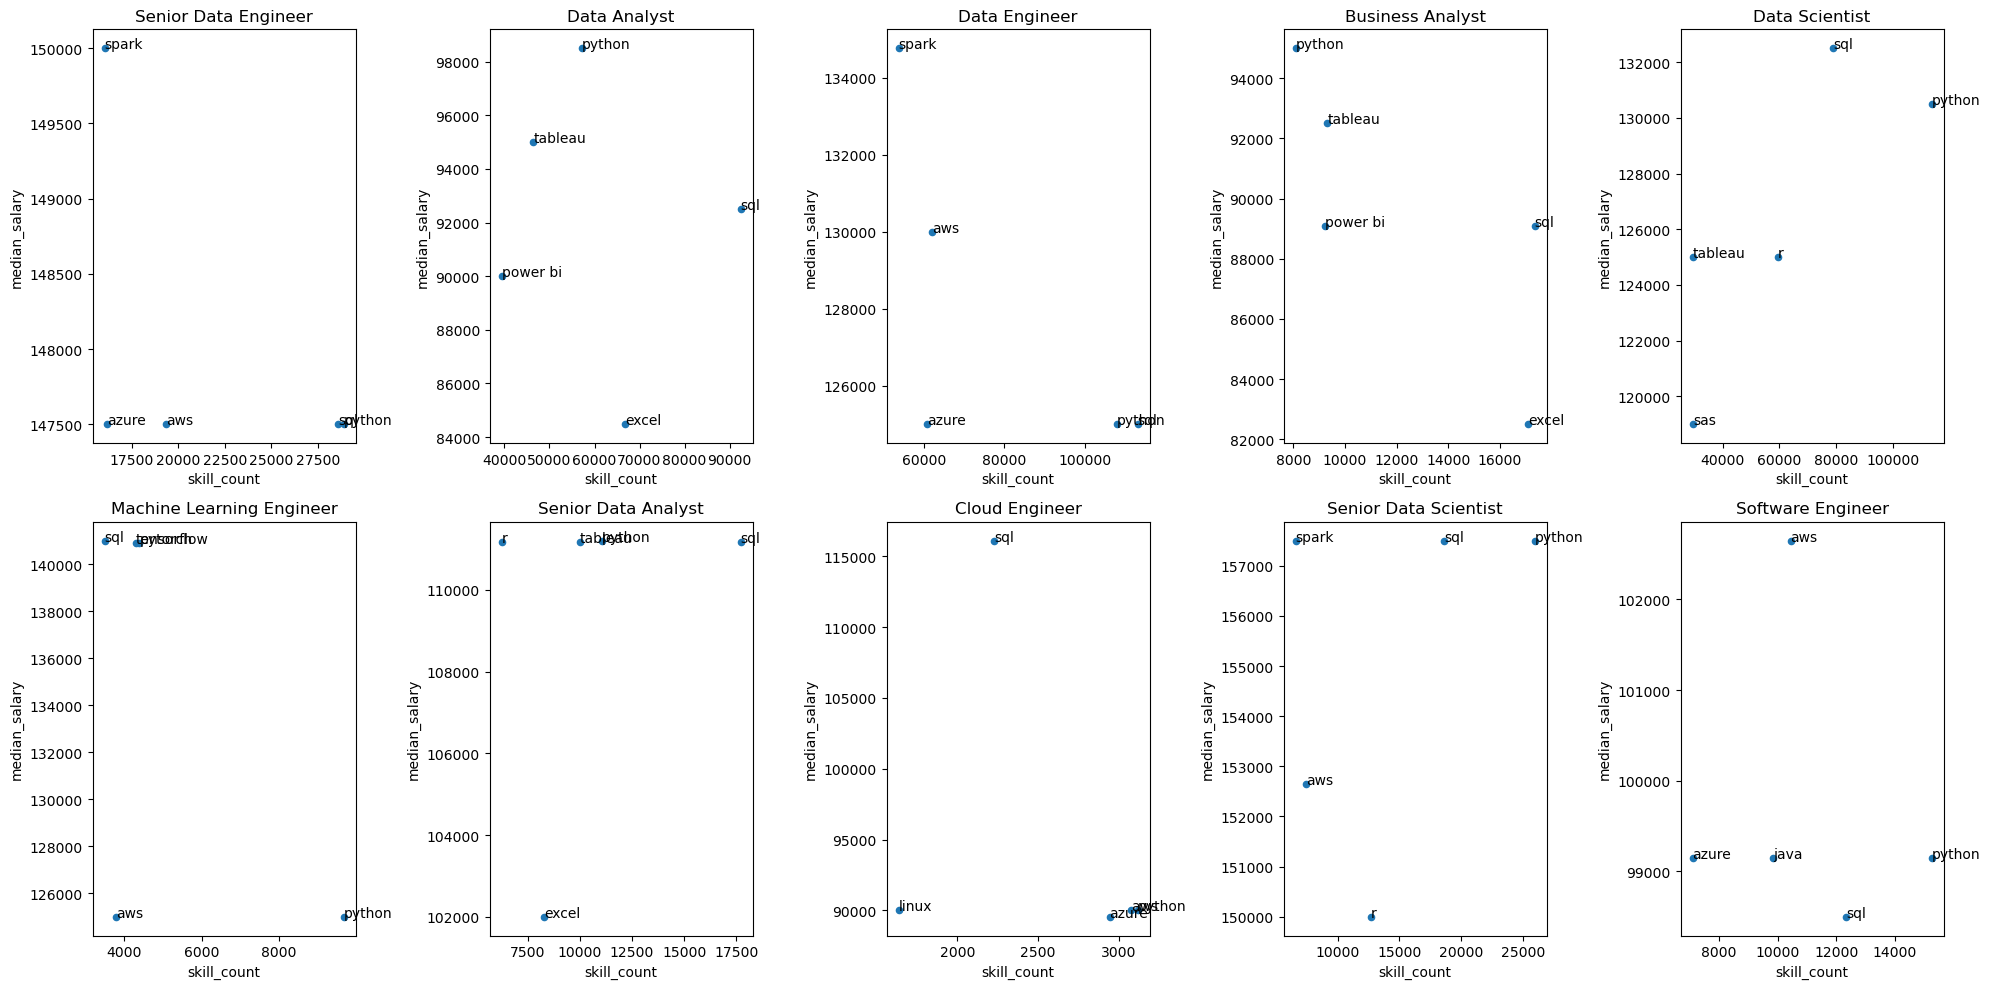

In [48]:
# Filter data for each job title
from matplotlib import pyplot as plt
fig , ax = plt.subplots(2,5, figsize= (20,10))  # Create a grid of subplots
ax= ax.flatten()
for i , jobs in enumerate(job_titles[:10]):
    df_job = new_df_exp[new_df_exp['job_title_short']==jobs]
    df_final=df_job.groupby('job_skills').agg(
        skill_count=('job_skills', 'count'),
        median_salary=('salary_year_avg', 'median')

    ).sort_values(by='skill_count',ascending=False).head(5).fillna(0)
    df_final.plot(kind='scatter', x='skill_count', y='median_salary', ax=ax[i],title=jobs) 
    for j in range(len(df_final)):
        ax[i].text(df_final['skill_count'].iloc[j], df_final['median_salary'].iloc[j], df_final.index[j])
fig.tight_layout()
    

**To Show Specified Using User Feed**

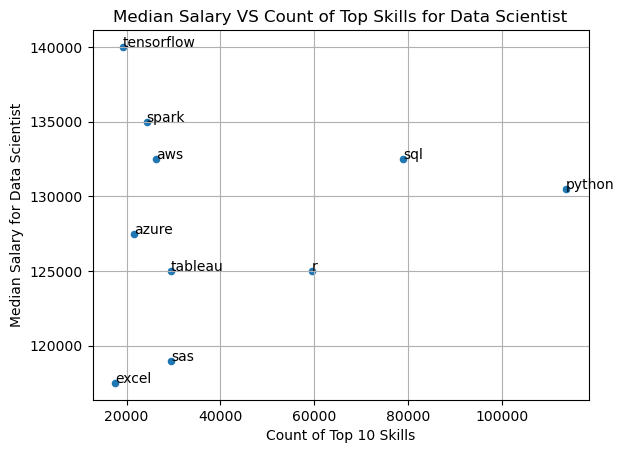

In [56]:
# User Input for Job Title and Top Skills
UserJobTitle = input('Enter the Job Title Short Name: ')
TopSkills = int(input('Enter the Number of Top Skills to Display: '))
user_df = new_df_exp[new_df_exp['job_title_short']== UserJobTitle]

# Groupby and aggregate the user's job title data

user_df_final = user_df.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
).fillna(0).sort_values(by='skill_count',ascending=False).head(TopSkills)

# Plotting the user's job title data

user_df_final.plot(kind='scatter', x='skill_count',y='median_salary',grid=True,title=f'Median Salary VS Count of Top Skills for {UserJobTitle}')
plt.xlabel(f'Count of Top {TopSkills} Skills')
plt.ylabel(f'Median Salary for {UserJobTitle}')

# Annotating the points with skill names
for j in range(len(user_df_final)):
    plt.text(user_df_final['skill_count'].iloc[j]+0.1, user_df_final['median_salary'].iloc[j]+0.2, user_df_final.index[j])

plt.show() # Show the plot for user's job title data